<a href="https://colab.research.google.com/github/coughlinjennie/data71200/blob/main/data71200class7lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load wine dataset

In [ ]:
from sklearn.datasets import load_wine
dataset = load_wine()

# Testing/Training Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, stratify=dataset.target, random_state=66,test_size=0.2)

# PCA

## Import Decision Tree Classifer and run the pre-processed data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.944
              precision    recall  f1-score   support

     class 1       1.00      0.92      0.96        12
     class 2       0.88      1.00      0.93        14
     class 3       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



## 95% of Variance Explained

In [ ]:
# import and fit PCA
from sklearn.decomposition import PCA

# keep all the principal components of the data
pca1 = PCA()
# fit PCA model to data
pca1.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca1.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[9.98401172e-01 1.42284575e-03 9.61880033e-05 5.32579132e-05
 1.18410314e-05 8.18880826e-06 2.57115515e-06 1.34885106e-06
 1.10126996e-06 8.30192129e-07 3.68702688e-07 2.02336443e-07
 8.35245777e-08]


In [ ]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.99840117 0.00142285]


In [ ]:
# keep components to explain 95% of the variance
pca3 = PCA(n_components=0.95)
# fit PCA model to data
pca3.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.99840117]


In [ ]:
# Decision Tree on PCA-reduced data top two
# fit PCA model to data
X_train_pca2 = pca2.fit_transform(X_train)
# transform data onto the first two principal components
X_test_pca2 = pca2.transform(X_test)

#Refit the model
model2 = DecisionTreeClassifier(random_state=0).fit(X_train_pca2, y_train)

print("Accuracy on training set: {:.2f}".format(model2.score(X_train_pca2, y_train)))
print("Accuracy on test set: {:.2f}".format(model2.score(X_test_pca2, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.83


In [ ]:
# Decision Tree on PCA-reduced data 95%
# fit PCA model to data
X_train_pca3 = pca3.fit_transform(X_train)
# transform data onto the first two principal components
X_test_pca3 = pca3.transform(X_test)

#model2=LogisticRegression().fit(X_train_pca3, y_train)
model2 = DecisionTreeClassifier(random_state=0).fit(X_train_pca3, y_train)

print("Accuracy on training set: {:.2f}".format(model2.score(X_train_pca3, y_train)))
print("Accuracy on test set: {:.2f}".format(model2.score(X_test_pca3, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.64


## Test with an SVM (if you have time)

In [ ]:
# SVM on original data


In [ ]:
# SVM on PCA-reduced data


# Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA on Unscaled versus Scaled

Text(0, 0.5, 'Second principal component')

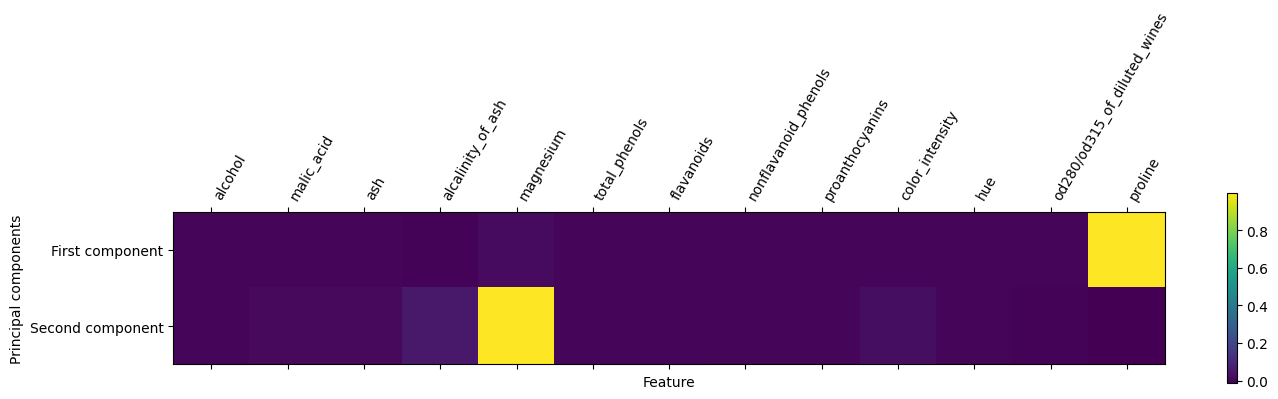

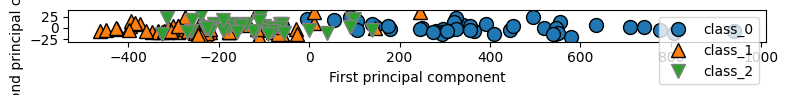

In [ ]:
#unscaled
# keep the first two principal components of the data
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)),
           dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# fit PCA model to training data
# transform data onto the first two principal components
# plot first vs. second principal component, colored by class
plt.figure(figsize=(9, 9))
mglearn.discrete_scatter(X_train_pca2 [:, 0], X_train_pca2 [:, 1], y_train)
plt.legend(dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# test on SVM

# visualize .components_ with plt.matshow


In [ ]:
# keep the first two principal components of the data

# fit PCA model to training data
# transform data onto the first two principal components

# test on SVM

# visualize .components_ with plt.matshow


### 95% of variance (if you have time)

In [ ]:
#unscaled

# capture 95% of the variance in the data

# fit PCA model to training data
# transform data onto the first two principal components


# test on SVM

# visualize .components_ with plt.matshow

In [ ]:
#scaled

# capture 95% of the variance in the data

# fit PCA model to training data
# transform data onto the first two principal components

# test on SVM

# visualize .components_ with plt.matshow

# NMF on Unscaled versus Scaled

In [ ]:
# keep the first two components of the data with NMF

# fit NMF model to data
# transform data onto the first two principal components

# evaluate SVM performance


In [ ]:
# keep the first two components of the data

# fit NMF model to data
# transform data onto the first two principal components

# evaluate SVM performance


# TSN versus PCA

In [ ]:
# install and load mglearn
!pip install mglearn
import mglearn

Text(0, 0.5, 'Second basis component')

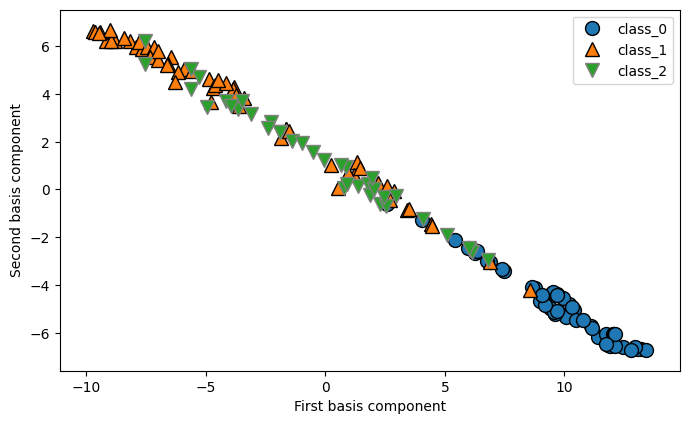

In [23]:
# unscaled

#tsne
# import TSNE
from sklearn.manifold import TSNE


# instantiate an instance of TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_train)

# plot the first two dimensions
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], y_train)
plt.legend(dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

# plot the first two dimensions of PCA


Text(0, 0.5, 'Second basis component')

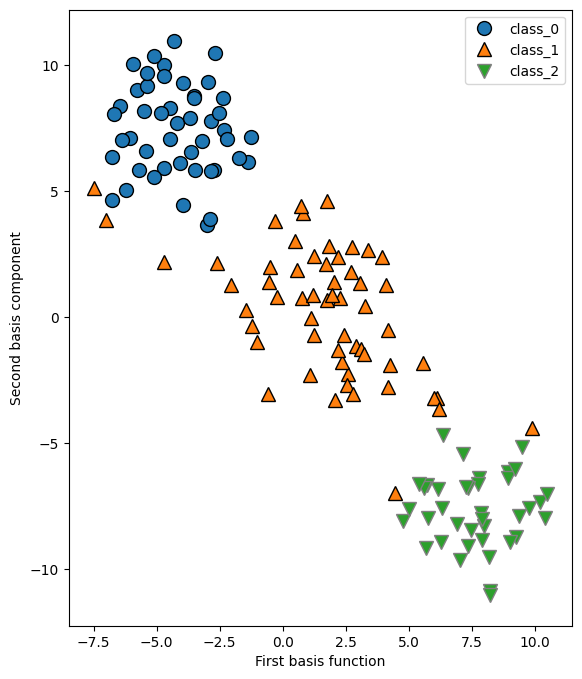

In [25]:
# scaled

#tsne
# instantiate an instance of TSNE
tsne2 = TSNE(random_state=42)
X_tsne2 = tsne.fit_transform(X_train_scaled)

# plot the first two dimensions
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne2[:, 0], X_tsne2[:, 1], y_train)
plt.legend(dataset.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

# plot the first two dimensions of PCA
